In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
data = pd.read_csv("weight-height data.csv")

#quick view of dataset
print(data.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [3]:
#1 pound = 0.453592 kg 
#present weight is in pounds : converting to kg for feasibility

Weight_Kg = []
for i in range(len(data.Weight)):
    raw= (data.Weight[i])*0.453592
    Weight_Kg.append(round(raw,2))

In [4]:
#Adding new column 
data["Weight_Kg"] = Weight_Kg

#Dropping Weight(pound) column
data = data.drop(["Weight"],axis=1)

print(data.head())

  Gender     Height  Weight_Kg
0   Male  73.847017     109.72
1   Male  68.781904      73.62
2   Male  74.110105      96.50
3   Male  71.730978      99.81
4   Male  69.881796      93.60


In [6]:
print(data.shape)

#Renaming Height column
data = data.rename(columns = ({"Height": "Height_inches"}))

print(data.head())

(10000, 3)
  Gender  Height_inches  Weight_Kg
0   Male      73.847017     109.72
1   Male      68.781904      73.62
2   Male      74.110105      96.50
3   Male      71.730978      99.81
4   Male      69.881796      93.60


In [8]:
#changing columns to dataframe variables
Weight = pd.DataFrame(data["Weight_Kg"])
Height = pd.DataFrame(data["Height_inches"])

In [10]:
# #Using multi variate linear regression

#As Gender is a string, linear regression cannot work on string data, converting to int:

Gender_new = []
for i in range(len(data)):
    if data["Gender"][i] == "Male":
        Gender_new.append(0)
    else:
        Gender_new.append(1)
        
data["Gender_new"] = Gender_new

In [11]:
lm2 = linear_model.LinearRegression();

#fitting of data
model2 = lm2.fit(data[["Height_inches","Gender_new"]],Weight);

In [13]:
model2.predict([[67,0]])

array([[79.33750723]])

In [15]:
#Finding coefficient 
model2.coef_

array([[ 2.71108045, -8.78970369]])

In [17]:
#Y-intercept for this model
model2.intercept_

array([-102.30488285])

In [19]:
#Predicting for our database values

res2 = model2.predict(data[["Height_inches","Gender_new"]])
print(res2)

[[97.9003212 ]
 [84.16839245]
 [98.61357495]
 ...
 [62.05667846]
 [76.06280032]
 [56.84124739]]


In [21]:
#score for multivariate linear regression : using 2 parameters : gender and height

model2.score(data[["Height_inches","Gender_new"]],Weight)

#The score has improved by 5% with introduction of gender!

0.9027493656638274

In [23]:
#Predicting weight corresponding to Sample data of  Heights and gender:

X1 = [[68,0],[90,1],[67,1],[78,0],[58,1]]
X1 = pd.DataFrame(X1)
Y1 = model2.predict(X1)

#Converting output to Dataframe
Y1 = pd.DataFrame(Y1)
res3 = pd.concat([X1,Y1],axis=1,keys=["Sample_data","Predicted_Weight_Kg"])
print(res3)

  Sample_data    Predicted_Weight_Kg
            0  1                   0
0          68  0           82.048588
1          90  1          132.902654
2          67  1           70.547804
3          78  0          109.159392
4          58  1           46.148079


ValueError: x and y must have same first dimension, but have shapes (10000, 1) and (5, 3)

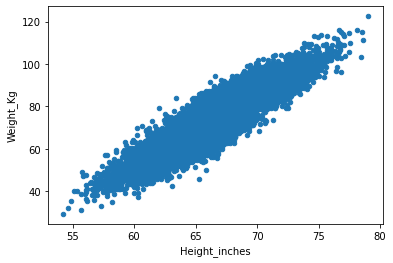

In [24]:
#Visualizing the result for our database
data.plot(kind="scatter",x="Height_inches",y="Weight_Kg");
plt.plot(Height,res3,color="red",linewidth=2);